# Laboratory Session - Exercise 03

 **Alice Pagano** - 1236916 
 
 *Padova, 29 April 2020*

In [1]:
# Import libraries
library(repr) # Library for plot size in jupyter
library(dplyr) # Library for operators
library(latex2exp) # Library for latex text


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Index <a class="anchor" id="0"></a>

1. [Exercise 1 - Time to complete a TOLC-I ](#1) <br>    
2. [Exercise 2 - Lifetime of tires ](#2) <br> 
3. [Exercise 3 - Markov's inequality ](#3) <br>
4. [Exercise 4 - Chebyshev’s inequality ](#4) <br>

## Exercise 1 - Time to complete a TOLC-I<a class="anchor" id="1"></a>
* [Index](#0)


Let us consider a density function of the form:

$$
f(X) = 
\begin{cases}
c(t-1)(2-t) & 1<t<2 \\
0 & \text{otherwise}
\end{cases}
$$

where $t$ is the time in hours.

### A ) 

In [2]:
# Define the density function of the time it takes a student to complete a TOLC-I 
# Fix the normalization parameter to 1
# Remark: x is the time in hours
c <- 1 

dfunc <- function(x){
        X <- ifelse(x>1 & x<2,
               c*(x-1)*(2-x), 
               0)
        return(X)
    }

# Fix the normalization parameter to the inverse of the integral
# in a way to obtain a normalized function
# (we integrate only in 1<x<2 because otherwise the function is zero)
c <- (integrate(dfunc,1,2)$value)^{-1} 

cat("Normalization constant: c =", c,"\n\n")

# Check if the density function is correctly normalized
cat("Area:",integrate(dfunc,1,2)$value)

Normalization constant: c = 6 

Area: 1

### B ) 

In [3]:
# Library for the inverse function
library(GoFKernel)

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


In [4]:
# Define the cumulative function
# (we integrate only in the region x>1)
pfunc <- Vectorize( function(x){
         if(x<=1){ return(0) }
         if(x>=2){ return(1) }
         else {
             X <- integrate(dfunc,1,x)$value
             return(X) }
         } )

# Define the quantile function as the inverse of the cumulative
qfunc <- Vectorize( inverse(pfunc,lower=1,upper=2) )

# Define the sampling function
rfunc <- function(n,bool=FALSE,seed=123){
        if(bool){ set.seed(seed) }       
        p <- runif(n)
        x <- qfunc(p)   
        return(x)
    }

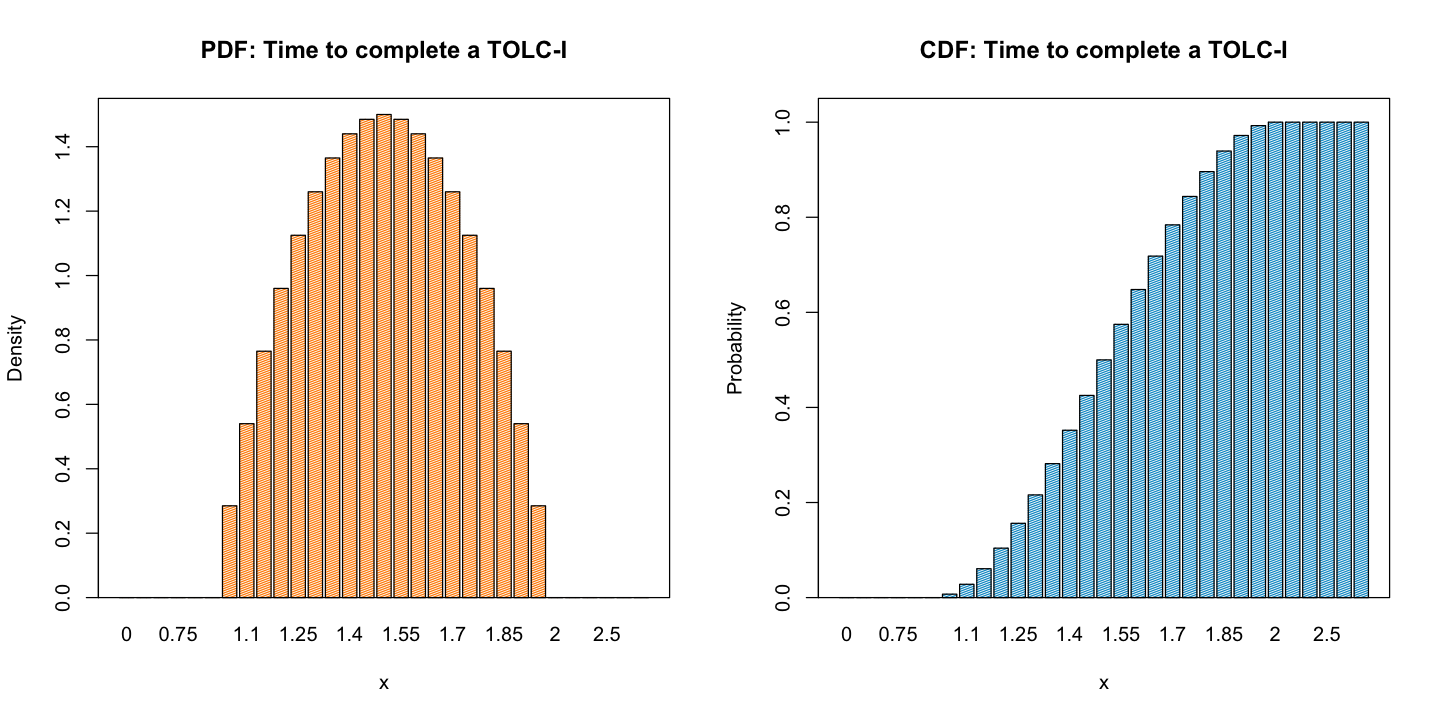

In [5]:
# Plot the PDF and CDF

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

x <-  c(seq(0,1, by=0.25),seq(1,2, by=0.05),seq(2,3, by=0.25)) 
df <- dfunc(x)
pf <- pfunc(x)

#PDF
barplot(df, names=x, col='darkorange', xlab='x', ylab='Density', density=60, 
        main="PDF: Time to complete a TOLC-I", ylim=c(0,max(df)+0.05))

box()

#CDF
barplot(pf, names=x, col='deepskyblue3', xlab='x', ylab='Probability', density=60, 
        main="CDF: Time to complete a TOLC-I", ylim=c(0,1.05))
box()


### C ) 

In [6]:
# Compute the probability that the student will finish the test in more than 75 minutes

# Convert minutes in hours 
x <- 75/60

cat("Probability that the student will finish the test in more than 75 minutes:\n ")
cat("P(X>75min) =", 1-pfunc(x),"\n\n")

# Compute the probability that the student will finish the test in 90<t<120 minutes
# convert minutes in hours 
x1 <- 90/60
x2 <- 120/60

cat("Probability that the student will finish the test in 90<X<120 minutes:\n ")
cat("P(90<X<120) =", pfunc(x2)-pfunc(x1),"\n\n")


Probability that the student will finish the test in more than 75 minutes:
 P(X>75min) = 0.84375 

Probability that the student will finish the test in 90<X<120 minutes:
 P(90<X<120) = 0.5 



## Exercise 2 - Lifetime of tires<a class="anchor" id="2"></a>
* [Index](#0)

Let us consider a distribution function of the form:

$$
f(X) = 
\begin{cases}
2/x^2 & 1<x<2 \\
0 & \text{otherwise}
\end{cases}
$$

The lifetime of tires sold by an used tires shop is $10^4 \cdot x $ km, where $x$ is a random variable following the above distribution.

### A ) 

In [7]:
# Define the density function of the lifetime of tires sold by an used tires shop
dfunc <- function(x){
        X <- ifelse(x>1 & x<2,
               2/(x^2), 
               0)
        return(X)
    }

# Check if the density function is correctly normalized
cat("Area:",integrate(dfunc,1,2)$value)

Area: 1

In [8]:
# Define the cumulative function
# (we integrate only in the region x>1)
pfunc <- Vectorize( function(x){
         if(x<=1){ return(0) }
         if(x>=2){ return(1) }
         else {
             X <- integrate(dfunc,1,x)$value
             return(X) }
         } )

# Define the quantile function as the inverse of the cumulative
qfunc <- Vectorize( inverse(pfunc,lower=1,upper=2) )

# Define the sampling function
rfunc <- function(n,bool=FALSE,seed=123){
        if(bool){ set.seed(seed) }       
        p <- runif(n)
        x <- qfunc(p)   
        return(x)
    }

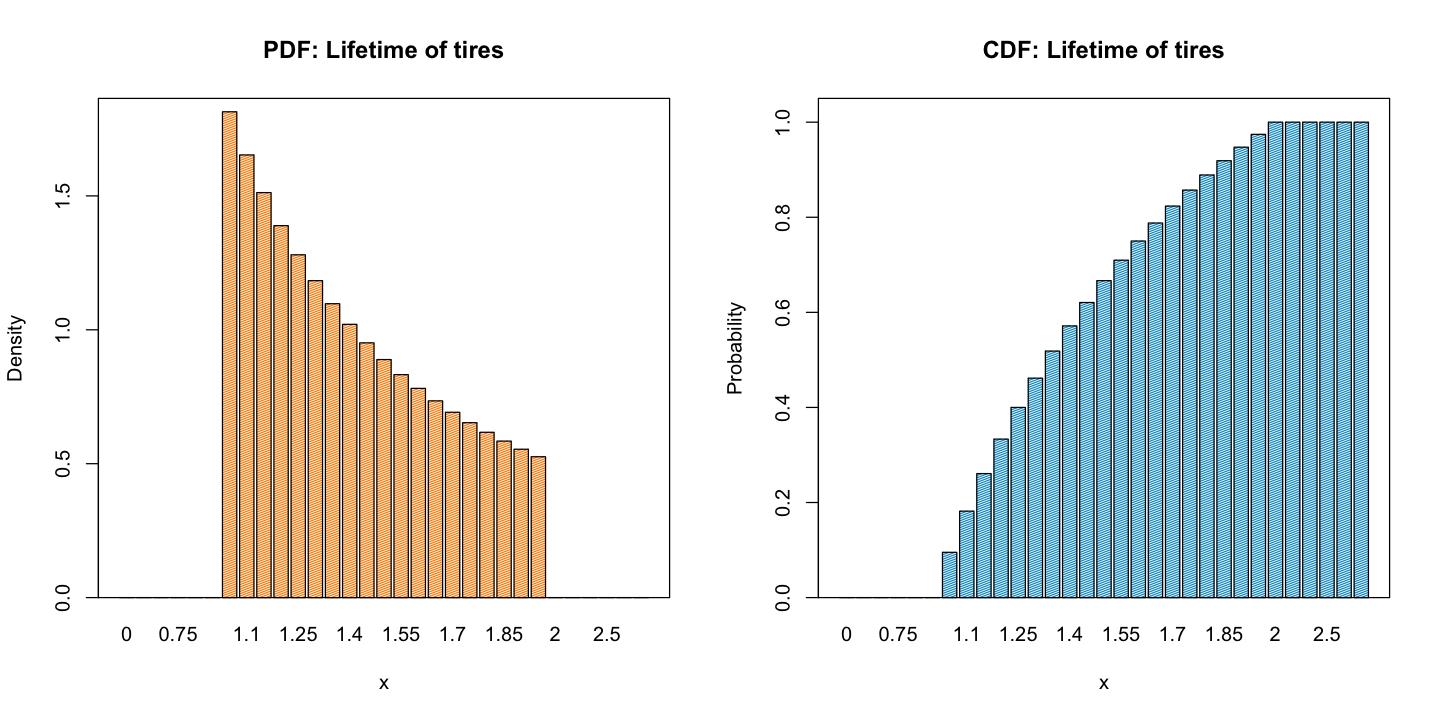

In [9]:
# Plot the PDF and CDF

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

x <- c(seq(0,1, by=0.25),seq(1,2, by=0.05),seq(2,3, by=0.25)) 
df <- dfunc(x)
pf <- pfunc(x)

#PDF
barplot(df, names=x, col='darkorange', xlab='x', ylab='Density', density=60, 
        main="PDF: Lifetime of tires", ylim=c(0,max(df)+0.05))

box()

#CDF
barplot(pf, names=x, col='deepskyblue3', xlab='x', ylab='Probability', density=60, 
        main="CDF: Lifetime of tires", ylim=c(0,1.05))
box()

### B ) 

In [10]:
# Determine the probability that tires will last less than 15000 km

x <- 15000/10^{4}

cat("Probability that tires will last less than 15000 km:\n ")
cat("P(X<x) =", pfunc(x),"\n\n")


Probability that tires will last less than 15000 km:
 P(X<x) = 0.6666667 



### C )

In [11]:
# Sample 3000 random variables from the distribution
v <- rfunc(3000)

# Compute the mean
mean <- mean(v)

# Compute the variance
var <- function(x){
       mean(x^2) - mean(x)^2
       }
variance <- var(v)

cat("Mean:", mean, "\tVariance:", variance)

Mean: 1.37858 	Variance: 0.0782111

## Exercise 3 - Markov's inequality<a class="anchor" id="3"></a>
* [Index](#0)


Let us consider Markov's inequality:

$$
P(X \ge k) \le \frac{E(X)}{k} \quad \text{for}\, k>0
$$

Having defined a function

$$
G(k) = 1 - F(k) \equiv P(X \ge k)
$$

where $F(k)$ is a cumulative distribution function, we plot $G(k)$ and the Markov's upper bound for different distributions.

### A ) Exponential distribution function

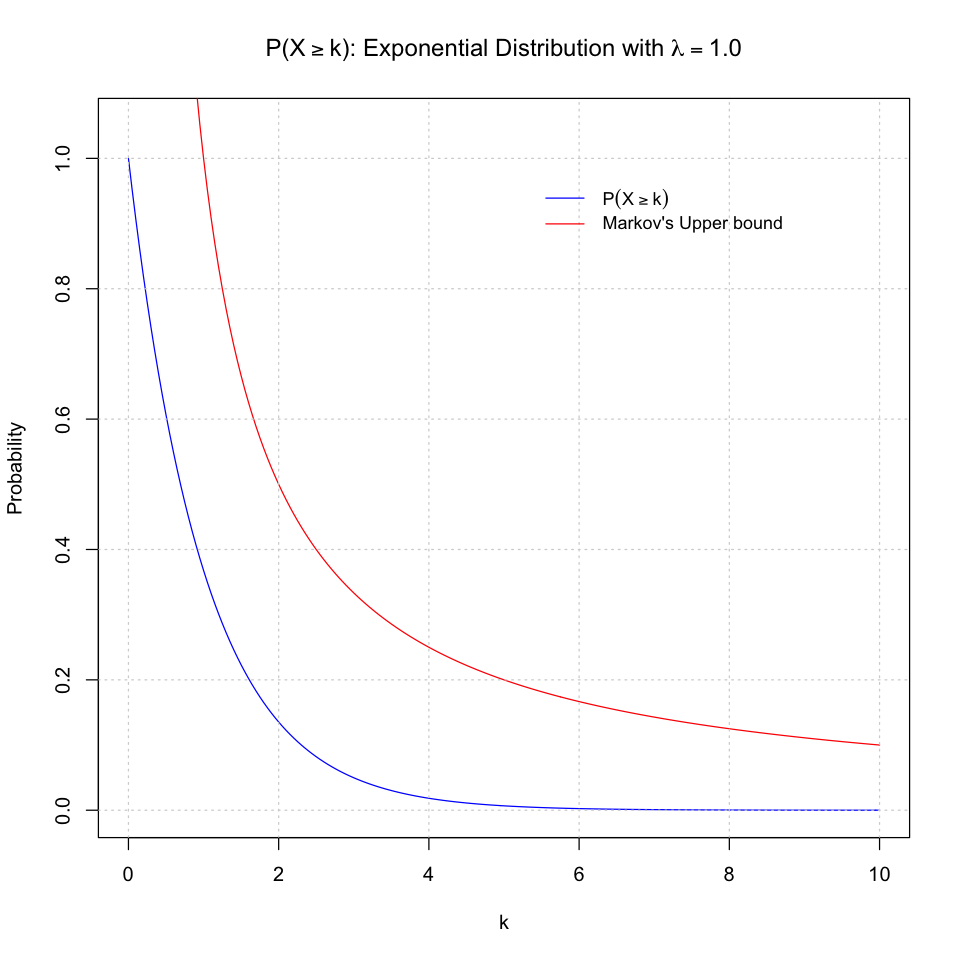

In [12]:
# Exponential distribution function

# set the size and position of the plots
options(repr.plot.width=8, repr.plot.height=8)

x <- seq(0,10,by=0.05)

lambda <- 1

gp <- 1 - pexp(x,lambda) 

# Compute the upper bound
xb <- x[-1]
exp <- 1/lambda # expectation value
ub <- exp/xb # vector of upper bounds

# Plot G(k) and the Markov's upper bound
plot(x,gp, type='l', col='blue', xlab='k', ylab="Probability",  
        main=TeX(sprintf("$P(X \\geq k)$: Exponential Distribution with $\\lambda = %.1f$",lambda)),
     ylim=c(0,1.05))

lines(xb,ub, type='l', col='red', lty=1)
grid()

legend("topright", inset=0.1,legend=c(expression(P(X>=k)),"Markov's Upper bound"),
       col=c("blue", "red"), lty=1:1, cex=0.9,
       box.lty=0)


### B ) Uniform distribution function

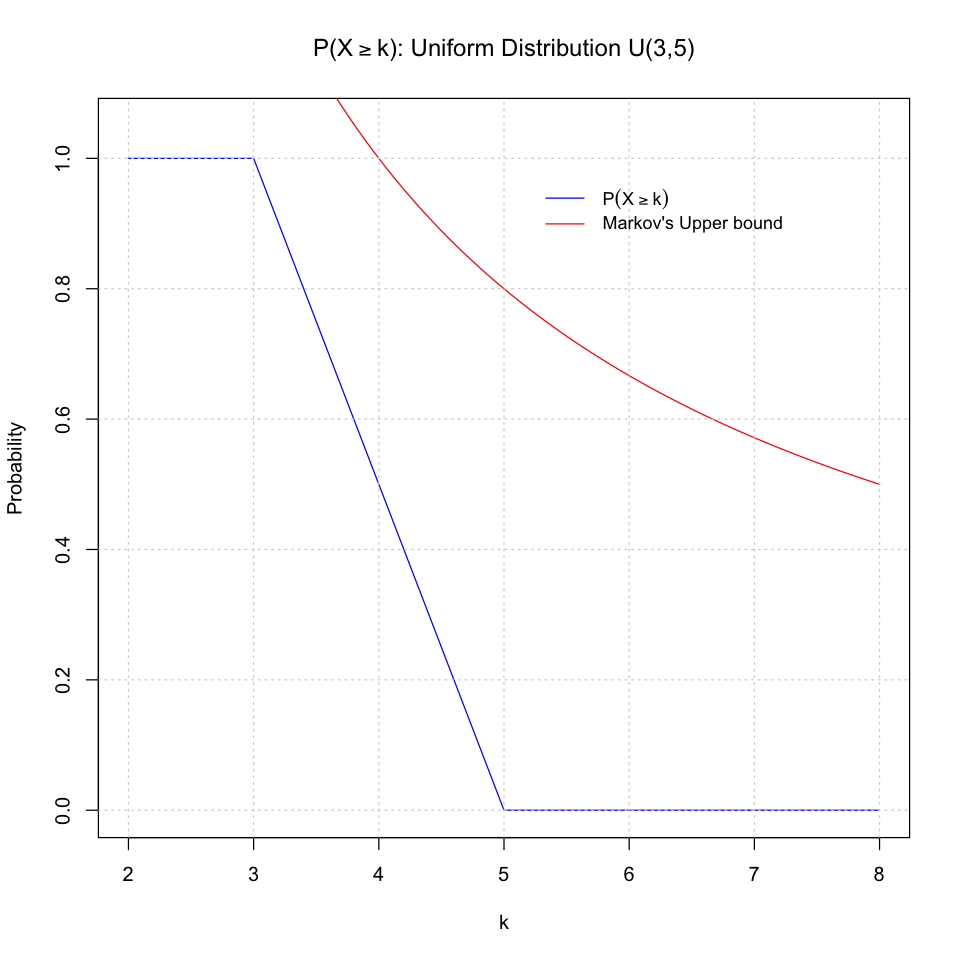

In [13]:
# Uniform distribution function

# set the size and position of the plots
options(repr.plot.width=8, repr.plot.height=8)

x <- seq(2,8,by=0.05)

a <- 3
b <- 5

gp <- 1 - punif(x,a,b) 

# Compute the upper bound
xb <- x[-1]
exp <- (a+b)/2 # expectation value
ub <- exp/xb # vector of upper bounds

# Plot G(k) and the Markov's upper bound
plot(x,gp, type='l', col='blue', xlab='k', ylab="Probability",  
        main=TeX(sprintf("$P(X \\geq k)$: Uniform Distribution $U(%1i,%1i)$",a,b)),
     ylim=c(0,1.05))

lines(xb,ub, type='l', col='red', lty=1)

grid()

legend("topright", inset=0.1,legend=c(expression(P(X>=k)),"Markov's Upper bound"),
       col=c("blue", "red"), lty=1:1, cex=0.9,
       box.lty=0)


### C ) Binomial distribution function

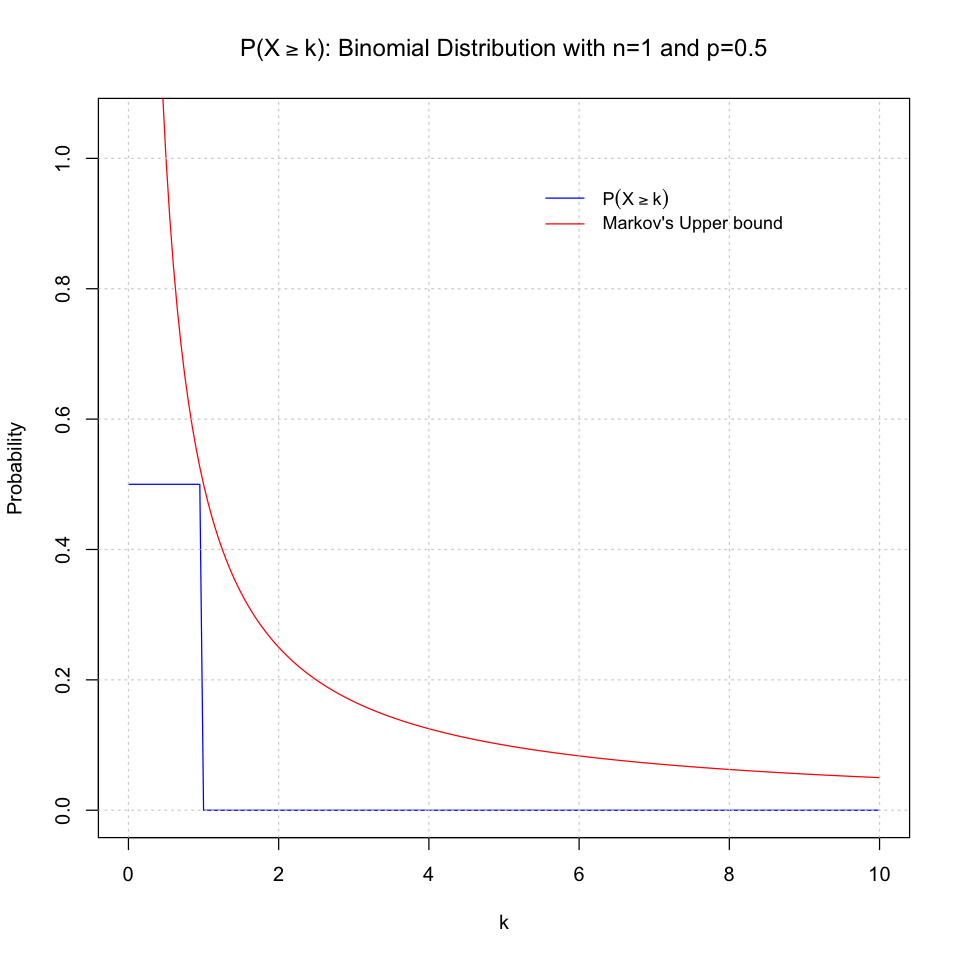

In [14]:
# Binomial distribution function

# set the size and position of the plots
options(repr.plot.width=8, repr.plot.height=8)

x <- seq(0,10,by=0.05)

n <- 1
p <- 1/2

gp <- 1 - pbinom(x,n,p) 

# Compute the upper bound
xb <- x[-1]
exp <- n*p # expectation value
ub <- exp/xb # vector of upper bounds

# Plot G(k) and the Markov's upper bound
plot(x,gp, type='l', col='blue', xlab='k', ylab="Probability",  
        main=TeX(sprintf("$P(X \\geq k)$: Binomial Distribution with n=%1i and $p=%.1f$",n,p)),
     ylim=c(0,1.05))

lines(xb,ub, type='l', col='red', lty=1)

grid()

legend("topright", inset=0.1,legend=c(expression(P(X>=k)),"Markov's Upper bound"),
       col=c("blue", "red"), lty=1:1, cex=0.9,
       box.lty=0)


### D ) Poisson distribution function

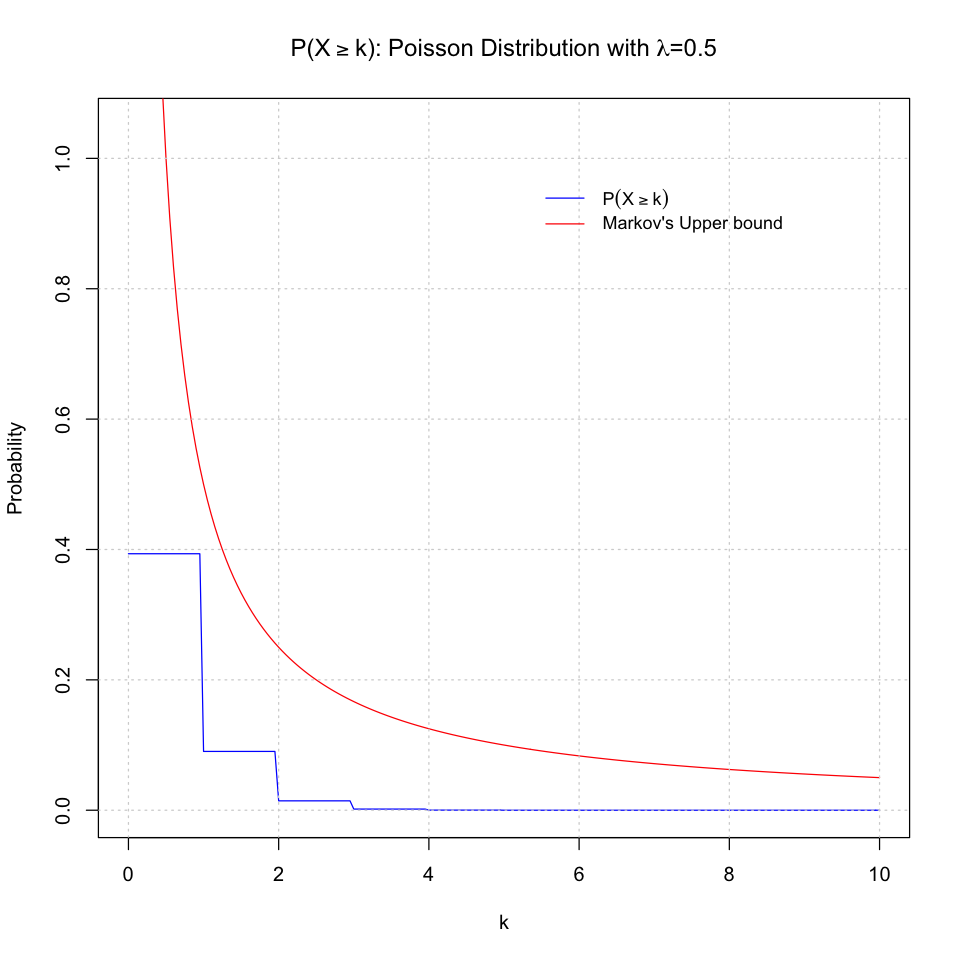

In [15]:
# Poisson distribution function

# set the size and position of the plots
options(repr.plot.width=8, repr.plot.height=8)

x <- seq(0,10,by=0.05)

lambda <- 1/2

gp <- 1 - ppois(x,lambda) 

# Compute the upper bound
xb <- x[-1]
exp <- lambda # expectation value
ub <- exp/xb # vector of upper bounds

# Plot G(k) and the Markov's upper bound
plot(x,gp, type='l', col='blue', xlab='k', ylab="Probability",  
        main=TeX(sprintf("$P(X \\geq k)$: Poisson Distribution with $\\lambda =%0.1f",lambda)),
     ylim=c(0,1.05))

lines(xb,ub, type='l', col='red', lty=1)

grid()

legend("topright", inset=0.1,legend=c(expression(P(X>=k)),"Markov's Upper bound"),
       col=c("blue", "red"), lty=1:1, cex=0.9,
       box.lty=0)

## Exercise 4 - Chebyshev’s inequality<a class="anchor" id="4"></a>
* [Index](#0)

Let us consider Chebyshev's inequality:

$$
P(|X-\mu| \ge k\sigma) \le \frac{1}{k^2}
$$

which can also be written as

$$
P(|X-\mu| < k\sigma) \ge 1 - \frac{1}{k^2}
$$

we plot $P(|X-\mu| \ge k\sigma)$ and the Chebyshev's upper bound for different distributions.

Firstly, we rewrite the second formula as:

$$
P(|X-\mu| < k\sigma)
=
P( - k\sigma + \mu < X < k\sigma + \mu)
=
P(X < k\sigma + \mu ) - P(X < - k\sigma + \mu)
$$


### A ) Normal distribution function

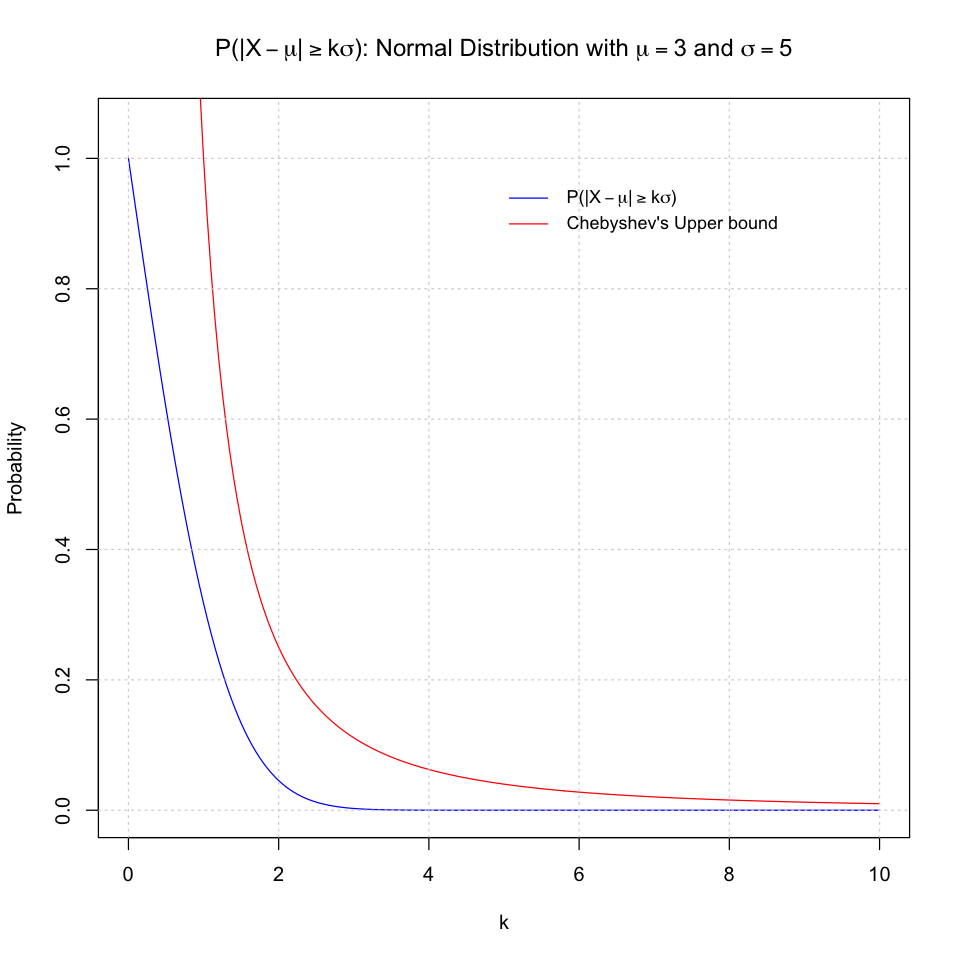

In [16]:
# Normal distribution function

# set the size and position of the plots
options(repr.plot.width=8, repr.plot.height=8)

x <- seq(0,10,by=0.05)

mu <- 3 # expectation value
sigma <- 5 

gp <- 1 - pnorm((x*sigma+mu),mean=mu,sd=sigma) + pnorm((-x*sigma+mu),mean=mu,sd=sigma)

# Compute the upper bound
xb <- x[-1]
ub <- 1/(xb^2) # vector of upper bounds

# Plot the distribution and the Chebyshev's upper bound
plot(x,gp, type='l', col='blue', xlab='k', ylab="Probability",  
        main=TeX(sprintf("$P(|X - \\mu |\\geq k \\sigma)$: Normal Distribution with $\\mu = %1i$ and $\\sigma = %1i$",mu,sigma)),
     ylim=c(0,1.05))

lines(xb,ub, type='l', col='red', lty=1)
grid()

legend("topright", inset=0.1,legend=c(TeX(sprintf("$P(|X - \\mu |\\geq k \\sigma)$")), "Chebyshev's Upper bound"),
       col=c("blue", "red"), lty=1:1, cex=0.9,
       box.lty=0)


### B ) Exponential distribution function

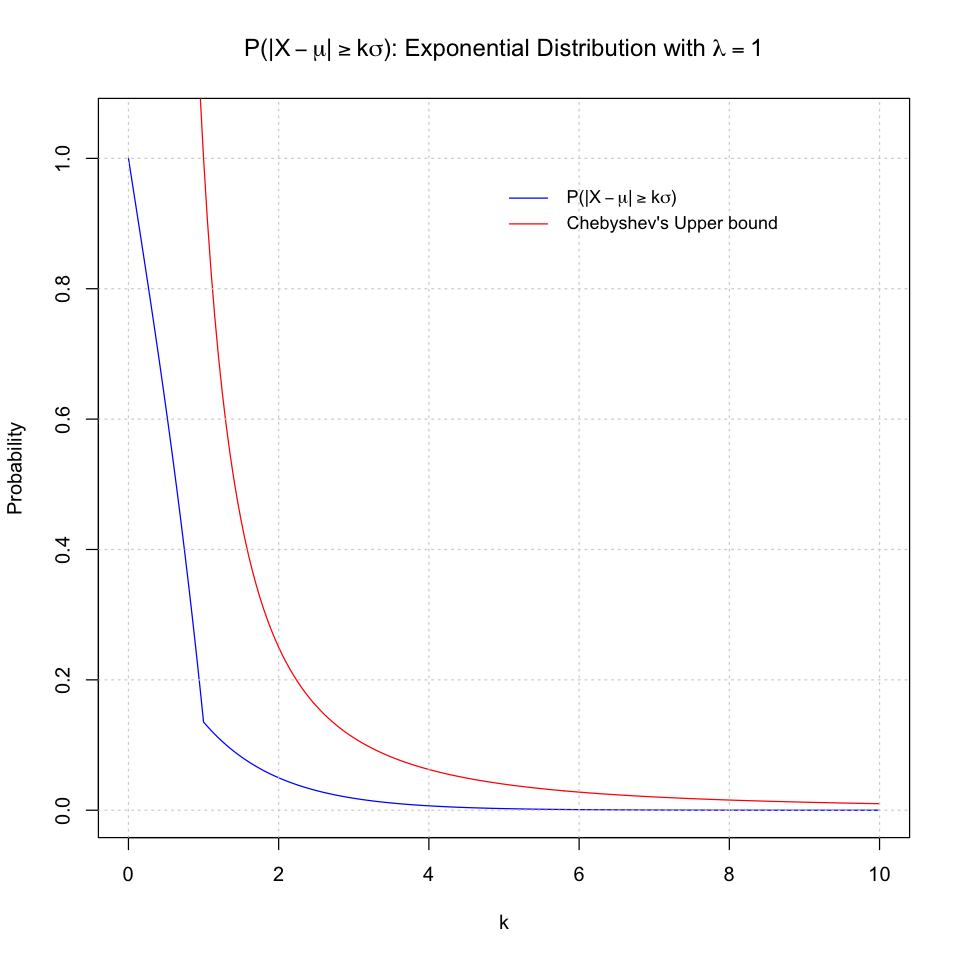

In [17]:
# Exponential distribution function

# set the size and position of the plots
options(repr.plot.width=8, repr.plot.height=8)

x <- seq(0,10,by=0.05)

lambda <- 1
mu <- 1/lambda # expectation value
sigma <- 1/(lambda)

gp <- 1 - pexp((x*sigma+mu),lambda) + pexp((-x*sigma+mu),lambda)

# Compute the upper bound
xb <- x[-1]
ub <- 1/(xb^2) # vector of upper bounds

# Plot the distribution and the Chebyshev's upper bound
plot(x,gp, type='l', col='blue', xlab='k', ylab="Probability",  
        main=TeX(sprintf("$P(|X - \\mu |\\geq k \\sigma)$: Exponential Distribution with $\\lambda = %1i$",lambda)),
     ylim=c(0,1.05))

lines(xb,ub, type='l', col='red', lty=1)
grid()

legend("topright", inset=0.1,legend=c(TeX(sprintf("$P(|X - \\mu |\\geq k \\sigma)$")), "Chebyshev's Upper bound"),
       col=c("blue", "red"), lty=1:1, cex=0.9,
       box.lty=0)


### C ) Uniform distribution function

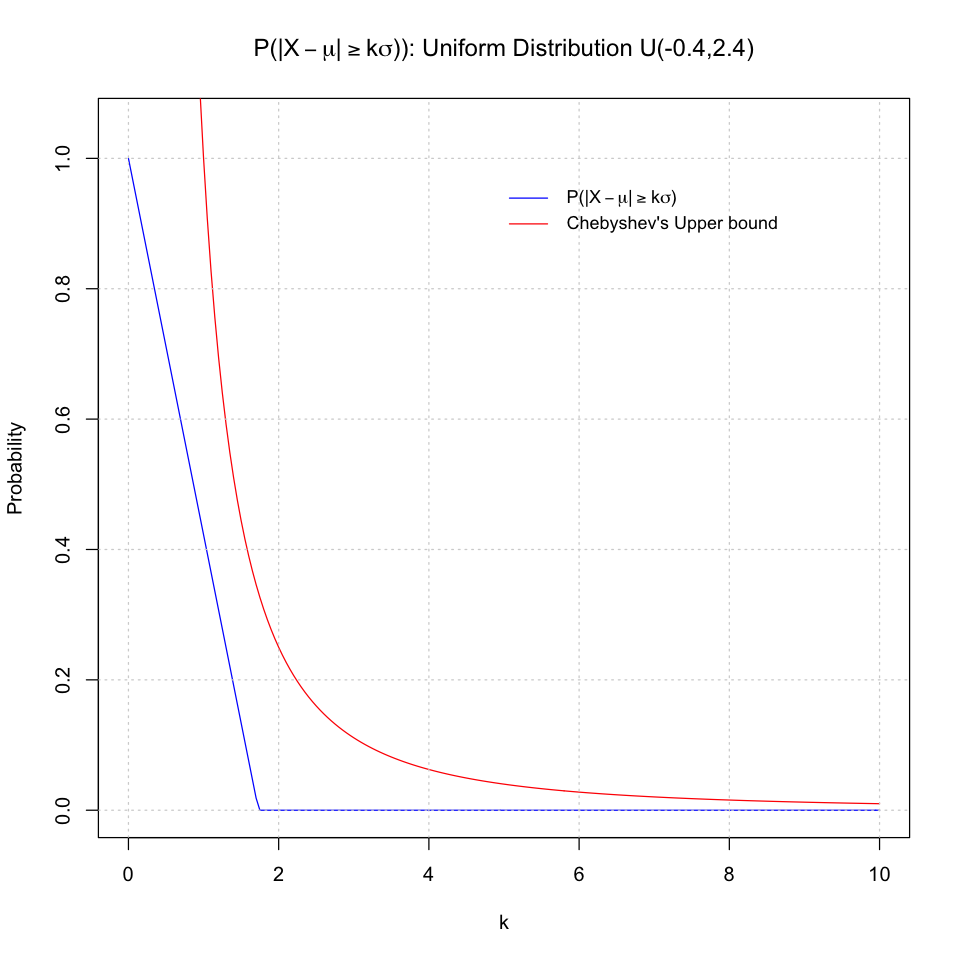

In [18]:
# Uniform distribution function

# set the size and position of the plots
options(repr.plot.width=8, repr.plot.height=8)

x <- seq(0,10,by=0.05)

a <- 1 - sqrt(2)
b <- 1 + sqrt(2)

mu <- (a+b)/2 # expectation value
sigma <- (b-a)/sqrt(12)

gp <- 1 - punif((x*sigma+mu),a,b) + punif((-x*sigma+mu),a,b)

# Compute the upper bound
xb <- x[-1]
ub <- 1/(xb^2) # vector of upper bounds

# Plot the distribution and the Chebyshev's upper bound
plot(x,gp, type='l', col='blue', xlab='k', ylab="Probability",  
        main=TeX(sprintf("$P(|X - \\mu |\\geq k \\sigma))$: Uniform Distribution $U(%.1f,%.1f)$",a,b)),
     ylim=c(0,1.05))

lines(xb,ub, type='l', col='red', lty=1)
grid()

legend("topright", inset=0.1,legend=c(TeX(sprintf("$P(|X - \\mu |\\geq k \\sigma)$")), "Chebyshev's Upper bound"),
       col=c("blue", "red"), lty=1:1, cex=0.9,
       box.lty=0)

### D ) Poisson distribution function

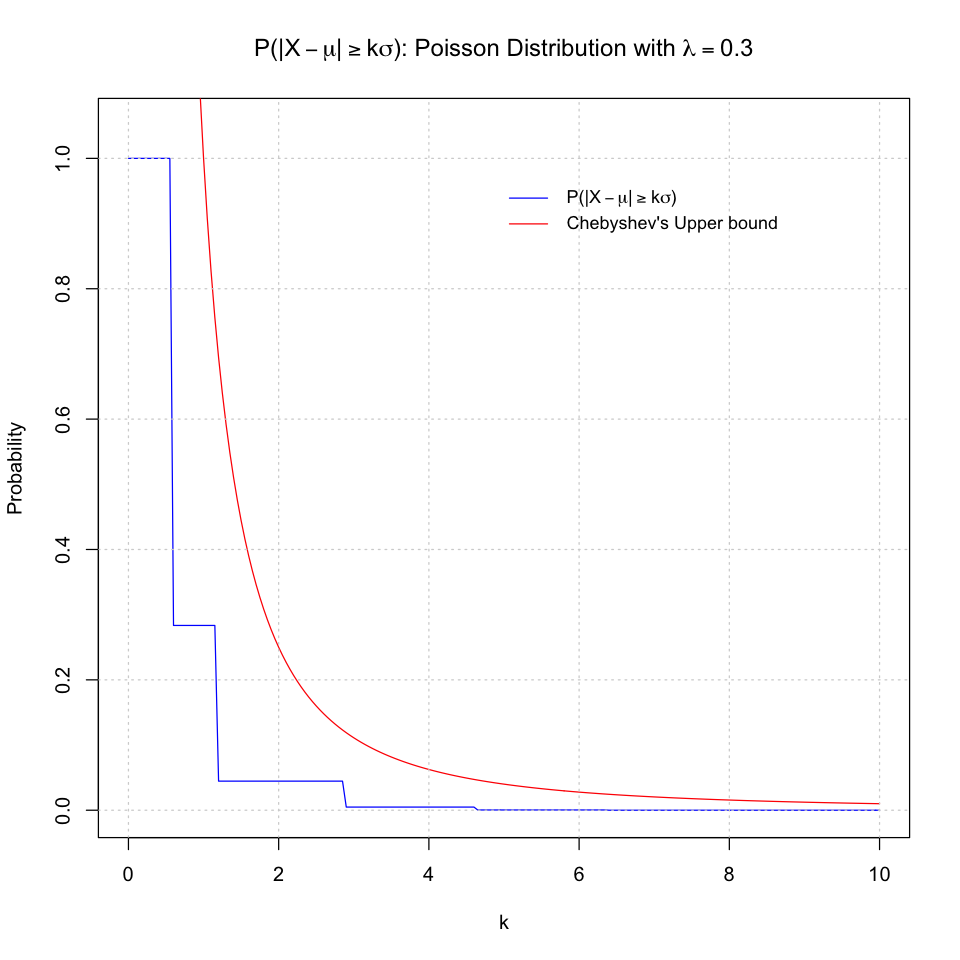

In [19]:
# Poisson distribution function

# set the size and position of the plots
options(repr.plot.width=8, repr.plot.height=8)

x <- seq(0,10,by=0.05)

lambda <- 1/3
mu <- lambda # expectation value
sigma <- sqrt(lambda) # variance

gp <- 1 - ppois((x*sigma+mu),lambda) + ppois((-x*sigma+mu),lambda)

# Compute the upper bound
xb <- x[-1]
ub <- 1/(xb^2) # vector of upper bounds

# Plot the distribution and the Chebyshev's upper bound
plot(x,gp, type='l', col='blue', xlab='k', ylab="Probability",  
        main=TeX(sprintf("$P(|X - \\mu |\\geq k \\sigma)$: Poisson Distribution with $\\lambda = %0.1f$",lambda)),
     ylim=c(0,1.05))

lines(xb,ub, type='l', col='red', lty=1)
grid()

legend("topright", inset=0.1,legend=c(TeX(sprintf("$P(|X - \\mu |\\geq k \\sigma)$")), "Chebyshev's Upper bound"),
       col=c("blue", "red"), lty=1:1, cex=0.9,
       box.lty=0)
